<a href="https://colab.research.google.com/github/SergioArtur/challenge-datascience2/blob/main/ChallengeDS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [337]:
# Importa a biblioteca 'requests' para fazer requisições HTTP
import requests

# Importa a biblioteca 'pandas' como 'pd' para manipulação de dados em formato de tabela
import pandas as pd

# Define a URL onde o arquivo JSON com os dados está hospedado
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

# Faz uma requisição GET para a URL e armazena a resposta na variável 'response'
response = requests.get(url)

# Converte o conteúdo da resposta em formato JSON para um dicionário Python
dadotelecom = response.json()

# Converte o dicionário JSON em um DataFrame do pandas
#Dessa forma é melhor para realizar a normalização do dado posteriomente
df = pd.DataFrame(dadotelecom)

# Exibe as 5 primeiras linhas do DataFrame
print(df.head())


   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [338]:
#Verificando as colunas e os tipos de dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [339]:
#Importando a bilbioteca para normalização
from pandas import json_normalize

#Normalizando os dados.
df_normalizado = json_normalize(dadotelecom)
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [340]:
#Resumo do dataframe
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

#🔧 Transformação

#Com os dados normalizados agora devemos realizar a limpeza e tratamento das informações:

Isso sempre deverá ser realizado ao analisar dados.

Valores únicos <br>
Duplicados <br>
Nulos(NaN "ausência de valor numérico", None "ausência de valor" <br>
Vazios ou em Branco <br>
Tipos de dados <br>
Valores atípicos <br>
Consistência e validez de dados categóricos <br>
Normalização de textos

In [341]:
# Verificando se há valores únicos em cada coluna (Variáveis Categóricas).
for col in df_normalizado.columns:  # Percorre todas as colunas do DataFrame df_normalizado.
    print(f"Valores únicos em cada coluna'{col}': {df_normalizado[col].nunique()}")
    # Exibe a quantidade de valores únicos presentes na coluna atual.
    if df_normalizado[col].nunique() < 50:  # Se a coluna tiver menos de 50 valores únicos...
        print(df_normalizado[col].unique())
        # Exibe os valores únicos da coluna.
        print('~' * 50)
        # Imprime uma linha separadora para facilitar a leitura dos resultados.

Valores únicos em cada coluna'customerID': 7267
Valores únicos em cada coluna'Churn': 3
['No' 'Yes' '']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'customer.gender': 2
['Female' 'Male']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'customer.SeniorCitizen': 2
[0 1]
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'customer.Partner': 2
['Yes' 'No']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'customer.Dependents': 2
['Yes' 'No']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'customer.tenure': 73
Valores únicos em cada coluna'phone.PhoneService': 2
['Yes' 'No']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'phone.MultipleLines': 3
['No' 'Yes' 'No phone service']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Valores únicos em cada coluna'internet.InternetService': 3
['DSL' 'Fiber o

In [342]:
# Cosultando Duplicados e somando os que tiverem
print("Numero de duplicados", df_normalizado.duplicated().sum())

Numero de duplicados 0


In [343]:
# Cosultando valores nulos(NaN "ausência de valor numérico", None "ausência de valor", diferente de vazio) e somando caso apresente
print("Consultando valores nulos ou ausente de valor", df_normalizado.isnull().sum())

Consultando valores nulos ou ausente de valor customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [344]:
# Cosultando valores Vazios ou em branco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [345]:
#Consultando antes de remover os vazios.
print("Antes:", len(df_normalizado))
# Remove espaços em branco no início e no fim de cada valor da coluna e Verifica se o valor não está vazio (depois da limpeza).
df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Depois:", len(df_normalizado))

Antes: 7267
Depois: 7043


In [346]:
#Alterando a coluna "account.Charges.Total" para Float64
#O argumento errors='coerce' instrui o pandas a substituir com NaN "ausência de valor numérico" qualquer valor que não puder ser convertido, ao invés de gerar erro.
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


/tmp/ipython-input-346-3767618745.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [347]:
# Consultando valores vazios ou em branco com a verificação lambda trazendo True or False e somando os valores.
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [348]:
#Contando a quantidade de colunas.
len(df_normalizado.columns)

21

In [349]:
# Calculando os gastos diários
df_normalizado['Total.Day'] = ((df_normalizado['account.Charges.Total'] / df_normalizado['customer.tenure']) /30 ).round(2)

# Inserindo a coluna na posição 19
df_normalizado.insert(19, 'Total.Day', df_normalizado.pop('Total.Day'))

/tmp/ipython-input-349-3344106315.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [350]:
#Consultando.
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.9,267.40


In [351]:
#Usando o describe() para obter as Estatísticas descritivas.
formatacao = df_normalizado.describe().rename(index={ #Melhorando (formatando) a visualização do describe
    'count': 'Contagem',
    'mean': 'Média',
    'std': 'Desvio Padrão',
    'min': 'Mínimo',
    '25%': '1º Quartil (25%)',
    '50%': 'Mediana (50%)',
    '75%': '3º Quartil (75%)',
    'max': 'Máximo'})
print(formatacao) # Exibe o DataFrame formatado

                  customer.SeniorCitizen  customer.tenure    Total.Day  \
Contagem                     7043.000000      7043.000000  7032.000000   
Média                           0.162147        32.371149     2.159879   
Desvio Padrão                   0.368612        24.559481     1.006217   
Mínimo                          0.000000         0.000000     0.460000   
1º Quartil (25%)                0.000000         9.000000     1.207500   
Mediana (50%)                   0.000000        29.000000     2.350000   
3º Quartil (75%)                0.000000        55.000000     3.010000   
Máximo                          1.000000        72.000000     4.050000   

                  account.Charges.Monthly  account.Charges.Total  
Contagem                      7043.000000            7032.000000  
Média                           64.761692            2283.300441  
Desvio Padrão                   30.090047            2266.771362  
Mínimo                          18.250000              18.800000 

#📊 Carga e análise

In [352]:
#Importando a biblioteca Plotly como px
import plotly.express as px
#Usando um gráfico de histograma (de barras) empilhadas (Masculino e Feminino)
px.histogram(df_normalizado, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'stack')

In [353]:
#Usando um gráfico de histograma (de barras) agrupado (Verifica se tem idade maior que 65 anos)
px.histogram(df_normalizado, x = 'customer.SeniorCitizen', text_auto = True, color = 'Churn', barmode = 'group')

In [354]:
#Usando um gráfico de histograma (de barras) empilhadas (Verificando a evasão (Churn) se o cliente possui parceira ou não)
px.histogram(df_normalizado, x = 'customer.Partner', text_auto = True, color = 'Churn', barmode = 'stack')

In [355]:
#Usando um gráfico de histograma (de barras) empilhadas (Verificando a evasão (Churn) se o cliente possui dependentes ou não)
px.histogram(df_normalizado, x = 'customer.Dependents', text_auto = True, color = 'Churn', barmode = 'stack')

In [356]:
#Gera um gráfico de barras (histograma agrupado), visualizando a distribuição de tempo de permanência dos clientes (Em meses), com destaque para o Churn (Evasão).
px.histogram(df_normalizado, x = 'customer.tenure', text_auto = True, color = 'Churn', barmode = 'group')

In [357]:
# Agrupa os dados por tempo (meses) de permanência (tenure) e status de Churn (se evadiu ou não).
# Conta quantos clientes existem em cada combinação de tenure (meses de contrato) x Churn (evasão).
# O resultado é uma tabela onde as colunas são os valores de Churn ('Yes' ou 'No').
df_grouped = df_normalizado.groupby(['customer.tenure', 'Churn']).size().unstack(fill_value=0)

# Calcula a taxa de churn (percentual de cancelamento) para cada valor de tenure.
# Fórmula: número de churns ('Yes') dividido pelo total de clientes daquele tenure, multiplicado por 100.
# Se não houver coluna 'Yes', usa 0 para evitar erro.
df_grouped['taxa_churn'] = (df_grouped.get('Yes', 0) / df_grouped.sum(axis=1)) * 100

# Exibe apenas a coluna com a taxa de churn calculada para cada tenure.
print(df_grouped[['taxa_churn']])


Churn            taxa_churn
customer.tenure            
0                  0.000000
1                 61.990212
2                 51.680672
3                 47.000000
4                 47.159091
...                     ...
68                 9.000000
69                 8.421053
70                 9.243697
71                 3.529412
72                 1.657459

[73 rows x 1 columns]


In [358]:
# Cria um gráfico de linha usando Plotly Express com os dados do DataFrame df_grouped.
# É necessário resetar o índice para que 'customer.tenure' volte a ser uma coluna acessível diretamente.
fig = px.line(
    df_grouped.reset_index(),       # Converte o índice 'customer.tenure' em uma coluna normal
    x='customer.tenure',            # Define o eixo X como o tempo de permanência do cliente
    y='taxa_churn',                 # Define o eixo Y como a taxa de churn (%) calculada anteriormente
    markers=True,                   # Adiciona marcadores (pontos visuais) em cada ponto da linha
    title='Taxa de Churn(Evasão %) por Tenure'  # Define o título do gráfico
)

# Exibe o gráfico interativo na tela
fig.show()


In [359]:
#gráfico de dispersão (scatter plot) com Cada ponto representando um cliente;
px.scatter(df_normalizado,
    x="customer.tenure",               # Eixo X: tempo de permanência do cliente (em meses)
    y="account.Charges.Monthly",       # Eixo Y: valor cobrado mensalmente do cliente
    color="Churn",                     # Cor dos pontos: separa os dados por status de cancelamento ('Yes' ou 'No')
    title="Gasto mensal vs Meses de contrato por Churn(Evasão)")  # Título do gráfico

In [360]:
#Verificando a taxa de evasão com a assinatura do serviço telefônico
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados para visualização
    x='phone.PhoneService',           # Eixo X: indica se o cliente possui ou não serviço de telefone
    text_auto=True,                   # Mostra automaticamente os valores (contagens) sobre as barras
    color='Churn',                    # As barras serão coloridas com base no status de cancelamento (Churn = Yes ou No)
    barmode='stack'                   # Coloca as barras lado a lado (agrupadas) em vez de empilhadas
)

In [361]:
#Verificando a taxa de evasão com a assinatura linhas telefonicas ou não.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados para visualização
    x='phone.MultipleLines',          # Eixo X: indica se o cliente possui múltiplas linhas telefônicas
    text_auto=True,                   # Mostra automaticamente os valores (contagens) sobre as barras
    color='Churn',                    # As barras serão coloridas com base no status de cancelamento (Churn = Yes ou No)
    barmode='stack'                   # Coloca as barras lado a lado (agrupadas) em vez de empilhadas
)

In [362]:
#Verificando a taxa de evasão com o serviço de provedor de internet.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.InternetService',     # Eixo X: tipo de serviço de internet do cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [363]:
#Verificando a taxa de evasão com o serviço adicional de segurança online.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.OnlineSecurity',     # Eixo X: tipo de serviço adicional de segurança online para o cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [364]:
#Verificando a taxa de evasão com o serviço adicional de Backup online.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.OnlineBackup',        # Eixo X: tipo de serviço adicional de Backup online para o cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [365]:
#Verificando a taxa de evasão com o serviço adicional de proteção para o dispositivo.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.DeviceProtection',    # Eixo X: tipo de serviço adicional de proteção para o dispositivo do cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [366]:
#Verificando a taxa de evasão com o serviço adicional de suporte técnico com menos tempo de espera.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.TechSupport',         # Eixo X: tipo de serviço adicional de suporte técnico com menos tempo de espera para o cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [367]:
#Verificando a taxa de evasão com o serviço de assinatura de TV a cabo.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.StreamingTV',         # Eixo X: tipo de serviço de assinatura de TV a cabo para o cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [368]:
#Verificando a taxa de evasão com o serviço de assinatura de streaming de filmes.
px.histogram(
    df_normalizado,                   # DataFrame que contém os dados a serem visualizados
    x='internet.StreamingMovies',         # Eixo X: tipo de serviço de assinatura de streaming de filmes para o cliente
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # Mostra as barras lado a lado para comparação
)

In [369]:
# Gráfico de barras empilhadas, para verificar a evasão por tipo de contrato (mensal, anual bianual).
px.histogram(
    df_normalizado,                   # DataFrame com os dados a serem visualizados
    x='account.Contract',             # Eixo X: tipo de contrato do cliente (ex: mensal, anual, bienal)
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # As barras serão empilhadas (somando visualmente os valores de Churn dentro de cada tipo de contrato)
)

In [370]:
# Gráfico de barras empilhadas, para verificar a evasão por receber fatura online.
px.histogram(
    df_normalizado,                   # DataFrame com os dados a serem visualizados
    x='account.PaperlessBilling',     # Eixo X: receber fatura online.
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # As barras serão empilhadas (somando visualmente os valores de Churn dentro de cada tipo de contrato)
)

In [371]:
# Gráfico de barras empilhadas, para verificar a evasão por mês, anual e bianual
px.histogram(
    df_normalizado,                   # DataFrame com os dados a serem visualizados
    x='account.PaymentMethod',             # Eixo X: tipo de contrato do cliente (ex: mensal, anual, bienal)
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # As barras serão empilhadas (somando visualmente os valores de Churn dentro de cada tipo de contrato)
)

In [372]:
# Gráfico de barras empilhadas, para verificar a evasão por gasto diário
px.histogram(
    df_normalizado,                   # DataFrame com os dados a serem visualizados
    x='Total.Day',                    # Eixo X: Total de gasto diário por cliente por mês.
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='group'                   # As barras serão empilhadas (somando visualmente os valores de Churn dentro de cada tipo de contrato)
)

In [373]:
#Importanto a biblioteca Seaborn
import seaborn as sns

#Importanto a biblioteca matplotlib.pyplot para usar com a Seaborn
import matplotlib.pyplot as plt

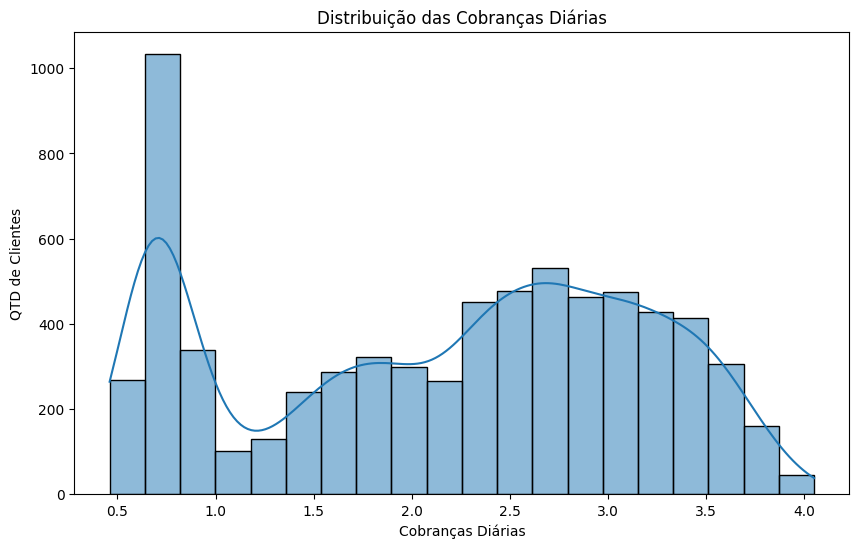

In [374]:
#Análise das cobranças diárias realizadas por clientes
plt.figure(figsize=(10, 6))

#Distribuição dos valores de cobrança diário
# Adiciona também a curva de densidade (KDE) para visualizar melhor a forma da distribuição
sns.histplot(df_normalizado['Total.Day'], kde=True) #Só o Seaborn tem essa curva (KDE)
plt.title('Distribuição das Cobranças Diárias')
plt.xlabel('Cobranças Diárias')
plt.ylabel('QTD de Clientes')
plt.show()

In [375]:
# gráfico boxplot (gráfico de caixa). Cada caixa mostra a mediana e os quartis
#(Contagem de Evasão por Variáveis Numéricas)
px.box(
    df_normalizado,                   # DataFrame com os dados para o gráfico
    x='Churn',                        # Eixo X: categorias de churn (ex: 'Yes' ou 'No')
    y='Total.Day',                    # Eixo Y: valores numéricos de encargos diário
    color='Churn'                     # Colore as caixas de acordo com o status de churn
)

In [376]:
# Gráfico de barras empilhadas, para verificar a evasão por gasto mensal
px.histogram(
    df_normalizado,                   # DataFrame com os dados a serem visualizados
    x='account.Charges.Monthly',      # Eixo X: Total de todos os serviços do cliente por mês.
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='group'                   # As barras serão empilhadas (somando visualmente os valores de Churn dentro de cada tipo de contrato)
)

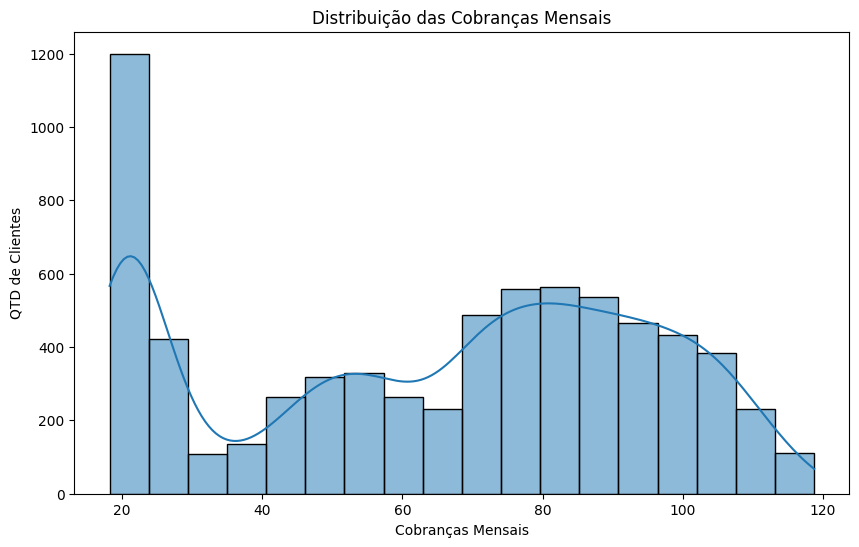

In [377]:
#Análise das cobranças mensais realizadas por clientes
plt.figure(figsize=(10, 6))

#Distribuição dos valores de cobrança mensal
# Adiciona também a curva de densidade (KDE) para visualizar melhor a forma da distribuição
sns.histplot(df_normalizado['account.Charges.Monthly'], kde=True) #Só o Seaborn tem essa curva (KDE)
plt.title('Distribuição das Cobranças Mensais')
plt.xlabel('Cobranças Mensais')
plt.ylabel('QTD de Clientes')
plt.show()

In [378]:
# gráfico boxplot (gráfico de caixa). Cada caixa mostra a mediana e os quartis
#(Contagem de Evasão por Variáveis Numéricas)
px.box(
    df_normalizado,                   # DataFrame com os dados para o gráfico
    x='Churn',                        # Eixo X: categorias de churn (ex: 'Yes' ou 'No')
    y='account.Charges.Monthly',      # Eixo Y: valores numéricos de encargos mensais
    color='Churn'                     # Colore as caixas de acordo com o status de churn
)


In [379]:
# Gráfico de barras empilhadas, para verificar a evasão por gasto total (Contagem de Evasão por Variáveis Numéricas)
px.histogram(
    df_normalizado,                   # DataFrame com os dados a serem visualizados
    x='account.Charges.Total',        # Eixo X: Total gasto pelo cliente.
    text_auto=True,                   # Mostra automaticamente os valores sobre cada barra
    color='Churn',                    # Usa a coluna 'Churn' para colorir as barras (ex: Yes ou No)
    barmode='stack'                   # As barras serão empilhadas (somando visualmente os valores de Churn dentro de cada tipo de contrato)
)

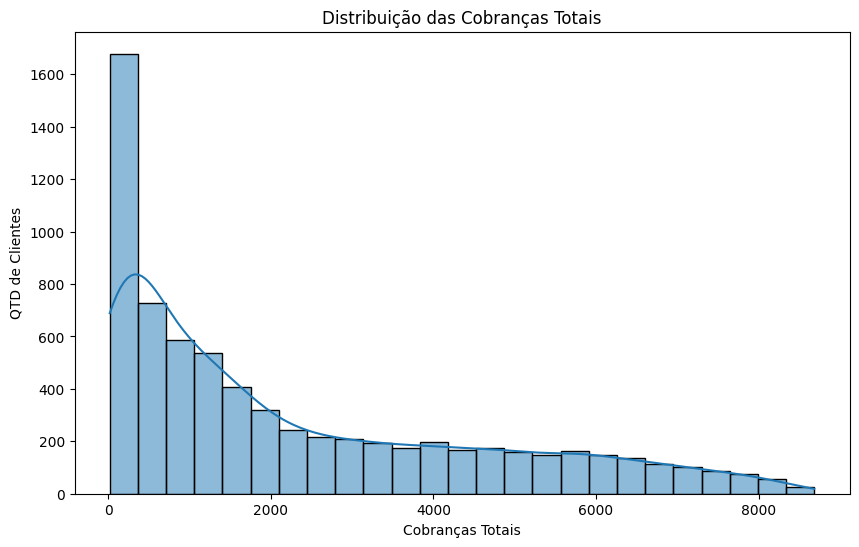

In [380]:
plt.figure(figsize=(10, 6)) # Cria uma nova figura para o gráfico, com tamanho 10x6 polegadas

# Cria o histograma da distribuição dos valores de cobrança total
# Adiciona também a curva de densidade (KDE) para visualizar melhor a forma da distribuição
sns.histplot(df_normalizado['account.Charges.Total'], kde=True)

plt.title('Distribuição das Cobranças Totais') # Define o título do gráfico
plt.xlabel('Cobranças Totais') # Define o nome do eixo X
plt.ylabel('QTD de Clientes') # Define o nome do eixo Y
plt.show()

In [381]:
# gráfico boxplot (gráfico de caixa). Cada caixa mostra a mediana e os quartis
#(Contagem de Evasão por Variáveis Numéricas)
px.box(
    df_normalizado,                   # DataFrame com os dados para o gráfico
    x='Churn',                        # Eixo X: categorias de churn (ex: 'Yes' ou 'No')
    y='account.Charges.Total',      # Eixo Y: valores numéricos de encargos Totais
    color='Churn'                     # Colore as caixas de acordo com o status de churn
)

#📄Relatorio Final

# Análise de Evasão de Clientes (Churn) – Telecom X

## Introdução

Foi realizada uma análise em uma base de **7.043 registros de clientes** da empresa Telecom X, com o objetivo de identificar os principais fatores que levam à evasão (Churn). O período de observação dos contratos foi de até **72 meses**, com valores de cobrança mensal variando entre  18,25 reais e 118,75 reais.


---

## Principais Fatores de Evasão Identificados

A análise revelou padrões claros entre os clientes que cancelaram seus serviços.

### Perfil do Cliente com Alta Evasão

- **Idade:** Clientes com menos de 65 anos.
- **Relacionamento:** Solteiros e sem parceiros (moram sozinhos).
- **Dependentes:** Sem dependentes.
- **Tempo de Contrato:** A maior parte da evasão ocorre nos primeiros **22 meses**.

### Serviços Contratados

Observou-se um alto índice de evasão nos seguintes grupos de clientes:

- **Serviços Principais**: Clientes com:
  - Telefone com múltiplas linhas.
  - Internet via **Fibra Ótica**.
- **Ausência de Serviços de Valor Agregado**:
  - Sem segurança online.
  - Sem backup.
  - Sem proteção de dispositivo.
  - Sem suporte técnico.


### Contrato e Forma de Pagamento

- **Tipo de Contrato:** A modalidade de contrato **mensal** apresenta uma evasão significativamente maior em comparação com os contratos de fidelidade **anual** ou **bianual**.
- **Método de Pagamento:** Clientes que optam pela **fatura online** e realizam o pagamento via **cheque eletrônico** possuem uma taxa de evasão elevada.

### Padrão de Gasto

- **Cobrança Diária:** Maior propensão à evasão entre clientes com gasto diário estimado entre 2,20 (66/mês) e 3,60 (108/mês).


---

## Relatório Final e Recomendações Estratégicas

Com base nos dados analisados, recomendamos as seguintes ações para reduzir a taxa de Churn:

1. **Foco no Público Jovem:** Criar campanhas de retenção voltadas a clientes mais jovens, principal grupo de risco.
2. **Incentivo a Contratos de Longo Prazo:** Oferecer benefícios para estimular contratos anuais ou bianuais, reduzindo a dependência do plano mensal.
3. **Gestão de Serviços de Internet:**
   - Para clientes **DSL**: destacar os benefícios de estabilidade.
   - Para clientes de **Fibra Ótica**: reforçar o valor agregado da tecnologia.
4. **Inclusão de Pacotes de Segurança:**
   - Combinar serviços como **segurança online, backup, proteção de dispositivo e suporte técnico** em pacotes principais.
   - Oferecer com preços atrativos para aumentar retenção.
5. **Otimização das Formas de Pagamento:**
   - Incentivar alternativas ao **cheque eletrônico**, como **débito automático ou cartão de crédito**, com recompensas ou descontos.
